In [1]:
import IJulia
import Base64

# The julia kernel has built in support for Revise.jl, so this is the 
# recommended approach for long-running sessions:
# https://github.com/JuliaLang/IJulia.jl/blob/9b10fa9b879574bbf720f5285029e07758e50a5e/src/kernel.jl#L46-L51

# Users should enable revise within .julia/config/startup_ijulia.jl:
# https://timholy.github.io/Revise.jl/stable/config/#Using-Revise-automatically-within-Jupyter/IJulia-1

# clear console history
IJulia.clear_history()

fig_width = 10
fig_height = 5
fig_format = :retina
fig_dpi = 96

# no retina format type, use svg for high quality type/marks
if fig_format == :retina
  fig_format = :svg
elseif fig_format == :pdf
  fig_dpi = 96
  # Enable PDF support for IJulia
  IJulia.register_mime(MIME("application/pdf"))
end

# convert inches to pixels
fig_width = fig_width * fig_dpi
fig_height = fig_height * fig_dpi

# Intialize Plots w/ default fig width/height
try
  import Plots

  # Plots.jl doesn't support PDF output for versions < 1.28.1
  # so use png (if the DPI remains the default of 300 then set to 96)
  if (Plots._current_plots_version < v"1.28.1") & (fig_format == :pdf)
    Plots.gr(size=(fig_width, fig_height), fmt = :png, dpi = fig_dpi)
  else
    Plots.gr(size=(fig_width, fig_height), fmt = fig_format, dpi = fig_dpi)
  end
catch e
  # @warn "Plots init" exception=(e, catch_backtrace())
end

# Initialize CairoMakie with default fig width/height
try
  import CairoMakie

  # CairoMakie's display() in PDF format opens an interactive window
  # instead of saving to the ipynb file, so we don't do that.
  # https://github.com/quarto-dev/quarto-cli/issues/7548
  if fig_format == :pdf
    CairoMakie.activate!(type = "png")
  else
    CairoMakie.activate!(type = string(fig_format))
  end
  CairoMakie.update_theme!(resolution=(fig_width, fig_height))
catch e
    # @warn "CairoMakie init" exception=(e, catch_backtrace())
end
  
# Set run_path if specified
try
  run_path = "L1VzZXJzL2hpcm9mdW1pNDgvMTYyMzQ4LmdpdGh1Yi5pby9wb3N0cy8yMDI0L1NsaWRlcw=="
  if !isempty(run_path)
    run_path = String(Base64.base64decode(run_path))
    cd(run_path)
  end
catch e
  @warn "Run path init:" exception=(e, catch_backtrace())
end


# emulate old Pkg.installed beahvior, see
# https://discourse.julialang.org/t/how-to-use-pkg-dependencies-instead-of-pkg-installed/36416/9
import Pkg
function isinstalled(pkg::String)
  any(x -> x.name == pkg && x.is_direct_dep, values(Pkg.dependencies()))
end

# ojs_define
if isinstalled("JSON") && isinstalled("DataFrames")
  import JSON, DataFrames
  global function ojs_define(; kwargs...)
    convert(x) = x
    convert(x::DataFrames.AbstractDataFrame) = Tables.rows(x)
    content = Dict("contents" => [Dict("name" => k, "value" => convert(v)) for (k, v) in kwargs])
    tag = "<script type='ojs-define'>$(JSON.json(content))</script>"
    IJulia.display(MIME("text/html"), tag)
  end
elseif isinstalled("JSON")
  import JSON
  global function ojs_define(; kwargs...)
    content = Dict("contents" => [Dict("name" => k, "value" => v) for (k, v) in kwargs])
    tag = "<script type='ojs-define'>$(JSON.json(content))</script>"
    IJulia.display(MIME("text/html"), tag)
  end
else
  global function ojs_define(; kwargs...)
    @warn "JSON package not available. Please install the JSON.jl package to use ojs_define."
  end
end


# don't return kernel dependencies (b/c Revise should take care of dependencies)
nothing


0.0%

┣                                    ┫ 0B/100.0kB [00:01<-31:-41:-36, -1s/B]


0.0%┣                                      ┫ 1B/100.0kB [00:01<Inf:Inf, InfGs/B]
1.3%┣▌                                     ┫ 1.3kB/100.0kB [00:01<01:57, 846B/s]


2.1%┣▉                                    ┫ 2.1kB/100.0kB [00:02<01:11, 1.4kB/s]


2.2%┣▉                                    ┫ 2.2kB/100.0kB [00:02<01:12, 1.4kB/s]
3.7%┣█▍                                   ┫ 3.7kB/100.0kB [00:02<00:44, 2.2kB/s]


5.0%┣█▉                                   ┫ 5.0kB/100.0kB [00:02<00:34, 2.8kB/s]
6.3%┣██▎                                  ┫ 6.3kB/100.0kB [00:02<00:27, 3.5kB/s]


7.6%┣██▉                                  ┫ 7.6kB/100.0kB [00:02<00:22, 4.1kB/s]
9.0%┣███▎                                 ┫ 9.0kB/100.0kB [00:02<00:19, 4.7kB/s]


10.4%┣███▋                               ┫ 10.4kB/100.0kB [00:02<00:17, 5.3kB/s]
11.7%┣████                               ┫ 11.7kB/100.0kB [00:02<00:15, 5.9kB/s]


13.1%┣████▋                              ┫ 13.1kB/100.0kB [00:02<00:14, 6.4kB/s]
14.5%┣█████                              ┫ 14.5kB/100.0kB [00:02<00:12, 6.9kB/s]


15.8%┣█████▌                             ┫ 15.8kB/100.0kB [00:02<00:11, 7.4kB/s]
17.2%┣██████                             ┫ 17.2kB/100.0kB [00:02<00:11, 7.8kB/s]


18.6%┣██████▌                            ┫ 18.6kB/100.0kB [00:02<00:10, 8.3kB/s]
20.0%┣███████                            ┫ 20.0kB/100.0kB [00:02<00:09, 8.7kB/s]


21.3%┣███████▌                           ┫ 21.3kB/100.0kB [00:02<00:09, 9.0kB/s]
22.7%┣████████                           ┫ 22.7kB/100.0kB [00:02<00:08, 9.4kB/s]


24.1%┣████████▍                          ┫ 24.1kB/100.0kB [00:02<00:08, 9.8kB/s]
25.4%┣████████▋                         ┫ 25.4kB/100.0kB [00:03<00:07, 10.1kB/s]


26.7%┣█████████                         ┫ 26.7kB/100.0kB [00:03<00:07, 10.4kB/s]
28.1%┣█████████▌                        ┫ 28.1kB/100.0kB [00:03<00:07, 10.8kB/s]


29.4%┣██████████                        ┫ 29.4kB/100.0kB [00:03<00:06, 11.0kB/s]
30.7%┣██████████▍                       ┫ 30.7kB/100.0kB [00:03<00:06, 11.3kB/s]


31.9%┣██████████▉                       ┫ 31.9kB/100.0kB [00:03<00:06, 11.6kB/s]
33.3%┣███████████▎                      ┫ 33.3kB/100.0kB [00:03<00:06, 11.8kB/s]


34.5%┣███████████▊                      ┫ 34.5kB/100.0kB [00:03<00:05, 12.1kB/s]
35.9%┣████████████▏                     ┫ 35.9kB/100.0kB [00:03<00:05, 12.3kB/s]


37.1%┣████████████▋                     ┫ 37.1kB/100.0kB [00:03<00:05, 12.5kB/s]
38.4%┣█████████████                     ┫ 38.4kB/100.0kB [00:03<00:05, 12.8kB/s]


39.6%┣█████████████▌                    ┫ 39.6kB/100.0kB [00:03<00:05, 12.9kB/s]
41.0%┣██████████████                    ┫ 41.0kB/100.0kB [00:03<00:04, 13.2kB/s]


42.4%┣██████████████▍                   ┫ 42.4kB/100.0kB [00:03<00:04, 13.4kB/s]
43.6%┣██████████████▉                   ┫ 43.6kB/100.0kB [00:03<00:04, 13.6kB/s]


45.0%┣███████████████▎                  ┫ 45.0kB/100.0kB [00:03<00:04, 13.8kB/s]
46.3%┣███████████████▊                  ┫ 46.3kB/100.0kB [00:03<00:04, 14.0kB/s]


47.7%┣████████████████▏                 ┫ 47.7kB/100.0kB [00:03<00:04, 14.2kB/s]
49.1%┣████████████████▊                 ┫ 49.1kB/100.0kB [00:03<00:04, 14.3kB/s]


50.4%┣█████████████████▏                ┫ 50.4kB/100.0kB [00:03<00:03, 14.5kB/s]
51.7%┣█████████████████▋                ┫ 51.7kB/100.0kB [00:04<00:03, 14.7kB/s]


53.0%┣██████████████████                ┫ 53.0kB/100.0kB [00:04<00:03, 14.9kB/s]
54.4%┣██████████████████▌               ┫ 54.4kB/100.0kB [00:04<00:03, 15.0kB/s]


55.8%┣███████████████████               ┫ 55.8kB/100.0kB [00:04<00:03, 15.2kB/s]
57.1%┣███████████████████▍              ┫ 57.1kB/100.0kB [00:04<00:03, 15.3kB/s]


58.4%┣███████████████████▉              ┫ 58.4kB/100.0kB [00:04<00:03, 15.5kB/s]
59.7%┣████████████████████▎             ┫ 59.7kB/100.0kB [00:04<00:03, 15.6kB/s]


60.9%┣████████████████████▊             ┫ 60.9kB/100.0kB [00:04<00:02, 15.7kB/s]
62.3%┣█████████████████████▏            ┫ 62.3kB/100.0kB [00:04<00:02, 15.9kB/s]


63.6%┣█████████████████████▋            ┫ 63.6kB/100.0kB [00:04<00:02, 16.0kB/s]
64.8%┣██████████████████████            ┫ 64.8kB/100.0kB [00:04<00:02, 16.1kB/s]


66.0%┣██████████████████████▍           ┫ 66.0kB/100.0kB [00:04<00:02, 16.1kB/s]
67.2%┣██████████████████████▉           ┫ 67.2kB/100.0kB [00:04<00:02, 16.2kB/s]


67.4%┣███████████████████████           ┫ 67.4kB/100.0kB [00:04<00:02, 15.8kB/s]
68.8%┣███████████████████████▍          ┫ 68.8kB/100.0kB [00:04<00:02, 16.0kB/s]


70.0%┣███████████████████████▉          ┫ 70.0kB/100.0kB [00:04<00:02, 16.0kB/s]
71.5%┣████████████████████████▎         ┫ 71.5kB/100.0kB [00:04<00:02, 16.2kB/s]


72.9%┣████████████████████████▉         ┫ 72.9kB/100.0kB [00:04<00:02, 16.3kB/s]
73.9%┣█████████████████████████         ┫ 73.9kB/100.0kB [00:05<00:02, 16.4kB/s]


75.2%┣█████████████████████████▋        ┫ 75.2kB/100.0kB [00:05<00:02, 16.5kB/s]
76.2%┣██████████████████████████        ┫ 76.2kB/100.0kB [00:05<00:01, 16.5kB/s]


77.7%┣██████████████████████████▍       ┫ 77.7kB/100.0kB [00:05<00:01, 16.6kB/s]
78.9%┣██████████████████████████▉       ┫ 78.9kB/100.0kB [00:05<00:01, 16.7kB/s]


80.2%┣███████████████████████████▎      ┫ 80.2kB/100.0kB [00:05<00:01, 16.8kB/s]
81.7%┣███████████████████████████▉      ┫ 81.7kB/100.0kB [00:05<00:01, 16.9kB/s]


83.0%┣████████████████████████████▎     ┫ 83.0kB/100.0kB [00:05<00:01, 17.0kB/s]
84.3%┣████████████████████████████▋     ┫ 84.3kB/100.0kB [00:05<00:01, 17.1kB/s]


85.6%┣█████████████████████████████▏    ┫ 85.6kB/100.0kB [00:05<00:01, 17.2kB/s]
86.9%┣█████████████████████████████▋    ┫ 86.9kB/100.0kB [00:05<00:01, 17.3kB/s]


88.2%┣██████████████████████████████    ┫ 88.2kB/100.0kB [00:05<00:01, 17.4kB/s]
89.7%┣██████████████████████████████▌   ┫ 89.7kB/100.0kB [00:05<00:01, 17.5kB/s]


91.2%┣███████████████████████████████   ┫ 91.2kB/100.0kB [00:05<00:00, 17.6kB/s]
92.7%┣███████████████████████████████▌  ┫ 92.7kB/100.0kB [00:05<00:00, 17.7kB/s]


94.2%┣████████████████████████████████  ┫ 94.2kB/100.0kB [00:05<00:00, 17.8kB/s]
95.5%┣████████████████████████████████▌ ┫ 95.5kB/100.0kB [00:05<00:00, 17.9kB/s]


96.8%┣█████████████████████████████████ ┫ 96.8kB/100.0kB [00:05<00:00, 18.0kB/s]
98.1%┣█████████████████████████████████▍┫ 98.1kB/100.0kB [00:05<00:00, 18.0kB/s]


99.4%┣█████████████████████████████████▉┫ 99.4kB/100.0kB [00:05<00:00, 18.1kB/s]
100.0%┣████████████████████████████████┫ 100.0kB/100.0kB [00:06<00:00, 18.1kB/s]
100.0%┣████████████████████████████████┫ 100.0kB/100.0kB [00:06<00:00, 18.1kB/s]


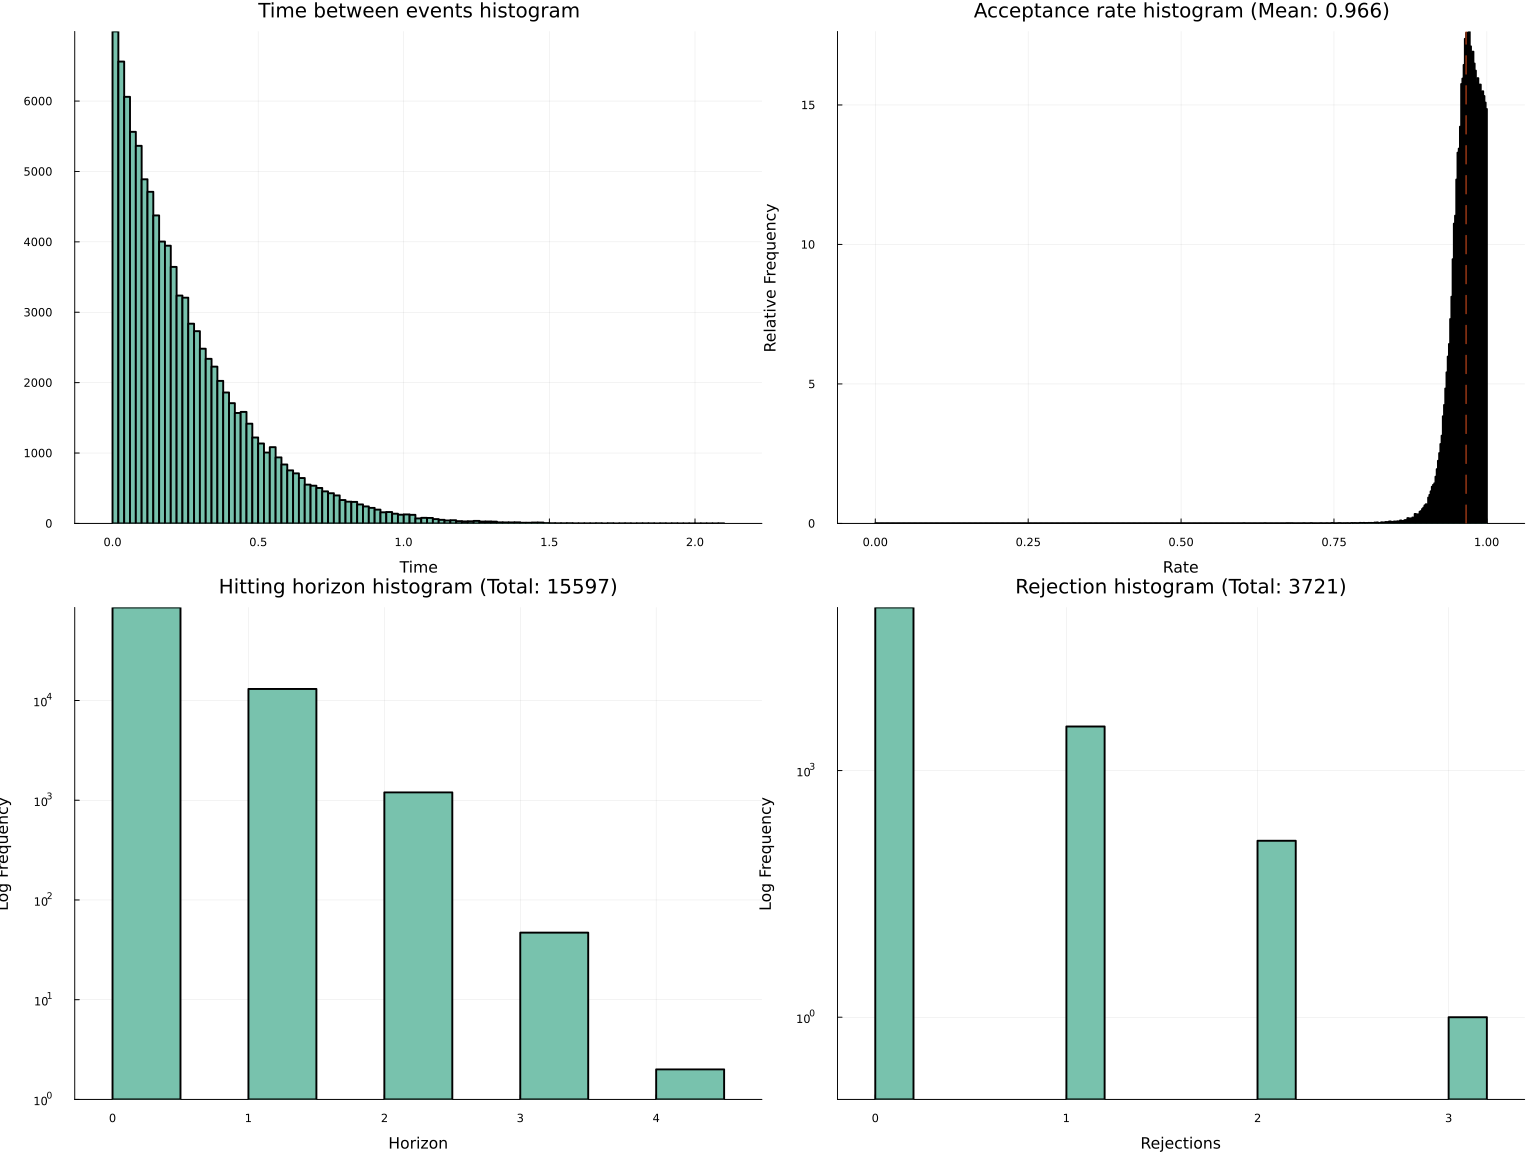

number of error bound: 0

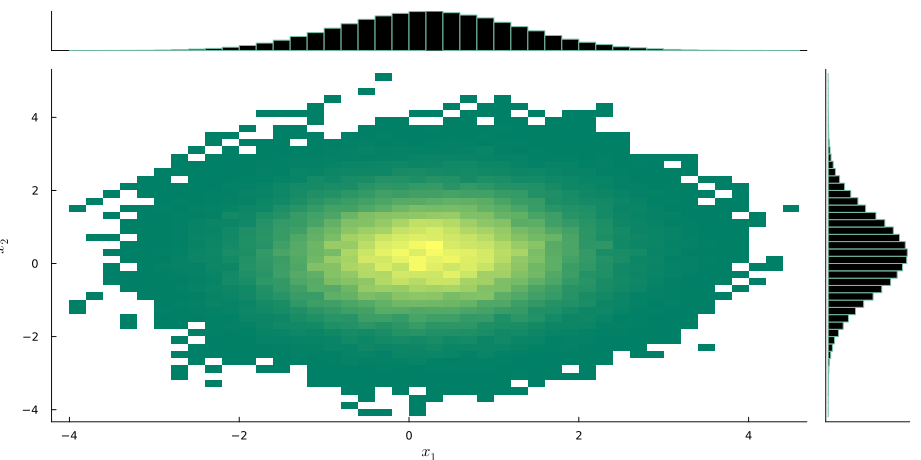

In [2]:
using PDMPFlux

function U_Gauss(x::Vector)
    return sum(x.^2) / 2
end

dim = 10
sampler = ZigZagAD(dim, U_Gauss, grid_size=10)

N_sk, N, xinit, vinit = 100_000, 100_000, zeros(dim), ones(dim)

output = sample_skeleton(sampler, N_sk, xinit, vinit, seed=2024)
samples = sample_from_skeleton(sampler, N, output)

diagnostic(output)
jointplot(samples)